![trainers in a store](trainers.jpg)

Sports clothing and athleisure attire is a huge industry, worth approximately [$193 billion in 2021](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/) with a strong growth forecast over the next decade! 

In this notebook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

You've been provided with five datasets to investigate:
* `info.csv`
* `finance.csv`
* `reviews.csv`
* `traffic.csv`
* `brands.csv`

The company has asked you to answer the following questions:

## What is the volume of products and average revenue for Adidas and Nike products based on price quartiles?

* Label products priced up to quartile one as `"Budget"`, quartile 2 as `"Average"`, quartile 3 as `"Expensive"`, and quartile 4 as `"Elite"`.
* Store as a `pandas` DataFrame called `adidas_vs_nike` containing the following columns: `"brand"`, `"price_label"`, `"count"`, and `"revenue"`.

## Do any differences exist between the word count of a product's description and its mean rating?

* Store the results as a `pandas` DataFrame called `description_lengths` containing the following columns: `"description_length"`, `"rating"`, `"reviews"`.

## How does the volume of products and median revenue vary between clothing and footwear?

* Store as a `pandas` DataFrame called `product_types` containing the following columns: `"clothing_products"`, `"clothing_revenue"`, `"footwear_products"`, `"footwear_revenue"`.

## Completing the project

* Create a dictionary called `revenue_analysis` containing the following key-value pairs:
	- `"brand_analysis"`: `adidas_vs_nike` DataFrame.
	- `"description_analysis"`: `description_lengths` DataFrame.
    - `"product_analysis"`: `product_types` DataFrame

# Code 
## Library and data import 

In [60]:
# import libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# improt data
info = pd.read_csv('info.csv')
finance = pd.read_csv('finance.csv')
reviews = pd.read_csv('reviews.csv')
traffic = pd.read_csv('traffic.csv')
brands = pd.read_csv('brands.csv')

## Data Cleaning
In this step, I am performing some data cleansing jobs.

### Clean the na values in the dataframes

In [62]:
# inspect dataframes and perform cleaning, one dataframe per cell 
# info dataframe
info.info()
info.describe()

# found the count of three columns are different
# there are na
pd.isna(info).sum(axis=0)

# exclude rows with na 
info = info[pd.isna(info).sum(axis=1) == 0]

# check the dataframe
pd.isna(info).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  3120 non-null   object
 1   product_id    3179 non-null   object
 2   description   3117 non-null   object
dtypes: object(3)
memory usage: 74.6+ KB


product_name    0
product_id      0
description     0
dtype: int64

In [63]:
# finance dataframe 
finance.info()
finance.describe(include='all')

# there are na in the numeric columns
pd.isna(finance).sum(axis=0)

# exclude the rows with na
finance = finance[pd.isna(finance).sum(axis=1) == 0]

# check the dataframe 
pd.isna(finance).sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   listing_price  3120 non-null   float64
 2   sale_price     3120 non-null   float64
 3   discount       3120 non-null   float64
 4   revenue        3120 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.3+ KB


product_id       0
listing_price    0
sale_price       0
discount         0
revenue          0
dtype: int64

In [64]:
# reviews dataframe 
reviews.info()
reviews.describe(include='all')

# there are na in two columns
pd.isna(reviews).sum(axis=0)

# exclude the rows with na
reviews = reviews[pd.isna(reviews).sum(axis=1) == 0]

# check the dataframe 
pd.isna(reviews).sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  3179 non-null   object 
 1   rating      3120 non-null   float64
 2   reviews     3120 non-null   float64
dtypes: float64(2), object(1)
memory usage: 74.6+ KB


product_id    0
rating        0
reviews       0
dtype: int64

In [65]:
# traffic dataframe 
traffic.info()
traffic.describe()

# check if there are na 
pd.isna(traffic).sum(axis=0)

# exclude the rows with na 
traffic = traffic[pd.isna(traffic).sum(axis=1) == 0]

# check the dataframe 
pd.isna(traffic).sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    3179 non-null   object
 1   last_visited  2928 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB


product_id      0
last_visited    0
dtype: int64

In [66]:
# brands dataframe
brands.info()
brands.describe()

# check if there are na 
pd.isna(brands).sum(axis=0)

# exclude the rows with na 
brands = brands[pd.isna(brands).sum(axis=1) == 0]

# check the dataframe 
pd.isna(brands).sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  3179 non-null   object
 1   brand       3120 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB


product_id    0
brand         0
dtype: int64

### Reflection on Data Cleaning of this Project 
- The repeated process to perform basicly same process of data cleaning is redundant and time consuming. Define function would be a better practice.
- There might be alternative way to achieve the same result. Such as outre join all the dataframe at the beginning and using index to exclude the rows with na. But I didn't use similar similar method. I might reconsider this question after getting more familiar with techniques like database and index.

## Answer the Questions
### Question One 



In [67]:
# this question focus on the finance dataframe joined with brands dataframe
# quartile based on the price using if statement
# join the two tables, finance and brands
df1 = pd.merge(finance, brands, on='product_id')
df1

# get the quartile using the describe function 
list_quartile = df1.describe()['listing_price']

# create new column to store price label
# go back to the top and import numpy to create a column full of na
df1['price_label'] = np.nan

# if statement to insert the price label
for x in range(len(df1)):
    if df1.loc[x, 'listing_price' ] <= list_quartile['25%']:
        df1.loc[x ,'price_label'] = 'Budget'
    elif df1.loc[x, 'listing_price'] <= list_quartile['50%']:
        df1.loc[x, 'price_label'] = 'Average'
    elif df1.loc[x,'listing_price'] <= list_quartile['75%']:
        df1.loc[x, 'price_label'] = 'Expensive'
    else:
        df1.loc[x, 'price_label'] = 'Elite'
        
df1


,product_id,listing_price,sale_price,discount,revenue,brand,price_label
0,G27341,75.99,37.99,0.5,1641.17,Adidas,Expensive
1,CM0081,9.99,5.99,0.4,398.93,Adidas,Budget
2,B44832,69.99,34.99,0.5,2204.37,Adidas,Expensive
3,D98205,79.99,39.99,0.5,5182.70,Adidas,Expensive
4,B75586,47.99,19.20,0.6,1555.20,Adidas,Average
...,...,...,...,...,...,...,...
3115,AT6100-606,0.00,64.95,0.0,0.00,Nike,Budget
3116,CT9155-063,0.00,139.95,0.0,251.91,Nike,Budget
3117,CI1236-100,159.95,127.97,0.0,230.35,Nike,Elite
3118,AH6799-300,0.00,169.95,0.0,1223.64,Nike,Budget


In [68]:
# using group by function to calculate count and sum on two columns
result1 = df1.groupby(by= ['brand', 'price_label']).agg({'product_id': 'count', 'revenue':'sum'}).reset_index()

# inspect the result
result1

# change the column name of product_id to required count
result1.columns = ['brand', 'price_label', 'count', 'revenue']

# check the result column name 
result1

# calculate average revenue by dividing count 
result1['revenue'] = round(result1['revenue'] / result1['count'], 2)
result1

# order by brand, revenue and count 
result1.sort_values(['brand', 'revenue', 'count'], ascending=False)

,brand,price_label,count,revenue
5,Nike,Budget,360,1654.40
6,Nike,Elite,130,1367.45
4,Nike,Average,8,675.59
7,Nike,Expensive,47,500.56
2,Adidas,Elite,587,8302.78
3,Adidas,Expensive,759,4621.56
0,Adidas,Average,655,3035.30
1,Adidas,Budget,574,2015.68


### Question Two 

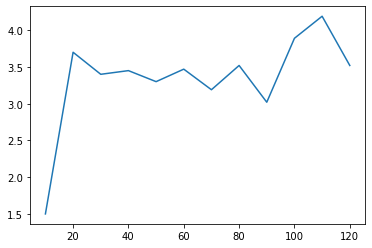

In [69]:
# this question focus on the info table and reviews table
# inspect two tables 
info.describe()
reviews.describe(include='all')

# join the two tables 
df2 = pd.merge(info, reviews, on='product_id')
df2.head()

# add a column which include the information of word count of description 
# count the space in the description 
df2['description_length'] = df2['description'].apply(lambda x : x.count(' '))
df2

# label description_length 
bins = sorted(np.arange(10,130,10), reverse=True)
for x in bins:
    for n in range(len(df2)):
        if df2.iloc[n, 5] < x:
            df2.loc[n,'length_label'] = x
df2

# add a column to calculate the mean rating weighted by reviews
df2['temp'] = df2['rating'] * df2['reviews']
# group by length_label
result2 = df2.groupby('length_label').agg({'temp': 'sum', 'reviews': 'sum'}).reset_index()
result2

# temp divide reviews to get the mean rating
result2['rating'] = np.divide(result2['temp'], result2['reviews'])
result2

# subset the dataframe to fulfill the requirement
result2 = result2.iloc[:,[0,2,3]]
result2

# trim the dataframe
# round 
result2['rating'] = round(result2['rating'], 2)
result2
# rename the column
result2 = result2.rename(columns={'length_label': 'description_length'})
result2

# visualization 
plt.plot(result2['description_length'], result2['rating'])


### Question 3 

In [70]:
# seems I can only distinguish from the product name 
# inspect info dataframe
info.info

# join the two table, info and finance 
df3 = pd.merge(info, finance, on= 'product_id')
df3
# convert product names to lower case 
df3['product_name'] = df3['product_name'].str.lower()

# create a list of key word to identify shoes 
list1 = ['shoe*', 'sneaker*', 'slipper*', 'sandal*']

# use regular expression to check rows 
df3['if_shoe'] = df3['product_name'].str.contains('|'.join(list1))
shoe = df3[df3['if_shoe'] == 1]
shoe 

# see others as clothing 
clothing = df3[~df3['if_shoe'] == 1]

# calculate median revenue and products count 
len(shoe)
len(clothing)
shoe_revenue = np.median(shoe['revenue'])
clothing_revenue = np.median(clothing['revenue'])

# create the answer data frame
result3 = pd.DataFrame({'clothing_products' : [len(clothing)], 'clothing_revenue': [clothing_revenue],
                        'footwear_products' : [len(shoe)], 'footwear_revenue': [shoe_revenue]}, columns= ['clothing_products', 'clothing_revenue',
                                                                                                          'footwear_products', 'footwear_revenue'])

In [74]:
# rename variables to satisfy the requirement 
adidas_vs_nike = result1
description_lengths = result2
product_types = result3

In [75]:
# Share your results in this format
revenue_analysis = {"brand_analysis": adidas_vs_nike,
                    "description_analysis": description_lengths,
                    "product_analysis": product_types}

# Call the answer!
revenue_analysis

{'brand_analysis':     brand price_label  count  revenue
 0  Adidas     Average    655  3035.30
 1  Adidas      Budget    574  2015.68
 2  Adidas       Elite    587  8302.78
 3  Adidas   Expensive    759  4621.56
 4    Nike     Average      8   675.59
 5    Nike      Budget    360  1654.40
 6    Nike       Elite    130  1367.45
 7    Nike   Expensive     47   500.56,
 'description_analysis':     description_length  reviews  rating
 0                 10.0     19.0    1.50
 1                 20.0    572.0    3.70
 2                 30.0  16164.0    3.40
 3                 40.0  46545.0    3.45
 4                 50.0  37747.0    3.30
 5                 60.0  18818.0    3.47
 6                 70.0   5071.0    3.19
 7                 80.0   2320.0    3.52
 8                 90.0   1021.0    3.02
 9                100.0    671.0    3.89
 10               110.0    357.0    4.19
 11               120.0    213.0    3.52,
 'product_analysis':    clothing_products  clothing_revenue  footwear_pr